In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from helpers import get_range
scaler = MinMaxScaler()

In [2]:
# Replace 'folder_path' with the actual path to your folder
folder_path = 'C:/Users/Bistecadmin/Desktop/FYP/BRATS_dataset/ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData'

# Get a list of all subfolder names in the folder
subfolder_names = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Print the list of subfolder names
print(subfolder_names)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Bistecadmin/Desktop/BRATS_dataset/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'

Unique [0 1 2 3]
Min - 0
Range -  3


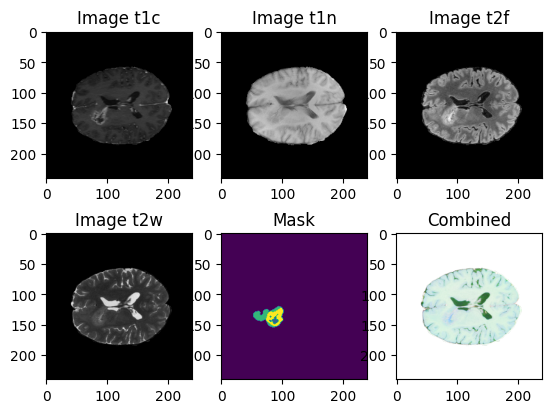

In [11]:
import cv2
from sklearn.preprocessing import LabelEncoder

for index,folder in enumerate(subfolder_names):
    parent_path = 'C:/Users/Bistecadmin/Desktop/BRATS_dataset/ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData/' + folder

    test_image_seg= nib.load(parent_path+ "/" + folder + "-seg.nii.gz").get_fdata()
    test_image_seg = test_image_seg.astype(np.int8)
    get_range(test_image_seg)
    # test_image_seg= scaler.fit_transform(test_image_seg.reshape(-1, test_image_seg.shape[-1])).reshape(test_image_seg.shape) #convert to a range of [0,1]
    test_image_seg = test_image_seg[:,:,86] #86 is the slice taken
    
    # labelencoder = LabelEncoder()
    # train_masks_reshaped = test_image_seg.reshape(-1,1)
    # train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
    # test_image_seg = train_masks_reshaped_encoded.reshape(240,240)
    

    test_image_t1c=nib.load(parent_path+ "/" + folder + "-t1c.nii.gz").get_fdata()
    test_image_t1c=scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)
    test_image_t1c = test_image_t1c[:,:,86]

    test_image_t1n=nib.load(parent_path+ "/" + folder + "-t1n.nii.gz").get_fdata()
    test_image_t1n=scaler.fit_transform(test_image_t1n.reshape(-1, test_image_t1n.shape[-1])).reshape(test_image_t1n.shape)
    test_image_t1n = test_image_t1n[:,:,86]

    test_image_t2f=nib.load(parent_path+ "/" + folder + "-t2f.nii.gz").get_fdata()
    test_image_t2f=scaler.fit_transform(test_image_t2f.reshape(-1, test_image_t2f.shape[-1])).reshape(test_image_t2f.shape)
    test_image_t2f = test_image_t2f[:,:,86]

    test_image_t2w=nib.load(parent_path+ "/" + folder + "-t2w.nii.gz").get_fdata()
    test_image_t2w=scaler.fit_transform(test_image_t2w.reshape(-1, test_image_t2w.shape[-1])).reshape(test_image_t2w.shape)
    test_image_t2w = test_image_t2w[:,:,86]

    combined_x = np.stack([test_image_t1c,test_image_t1n, test_image_t2f,test_image_t2w], axis=-1) #better to crop these . Also can use more channels

    np.save("validation_x_data/" + folder+ '_x.npy', combined_x)
    np.save("validation_y_data/" + folder+ '_y.npy', test_image_seg)

    # plt.subplot(231)
    # plt.imshow(test_image_t1c, cmap='gray')
    # plt.title('Image t1c')
    # plt.subplot(232)
    # plt.imshow(test_image_t1n, cmap='gray')
    # plt.title('Image t1n')
    # plt.subplot(233)
    # plt.imshow(test_image_t2f, cmap='gray')
    # plt.title('Image t2f')
    # plt.subplot(234)
    # plt.imshow(test_image_t2w, cmap='gray')
    # plt.title('Image t2w')
    # plt.subplot(235)
    # plt.imshow(test_image_seg)
    # plt.title('Mask')
    # plt.subplot(236)
    # plt.imshow(combined_x)
    # plt.title('Combined')
    # plt.show()
    # break
    print(index)
    if index >= 218:
        break

In [ ]:
combined_x = np.stack([test_image_t1c,test_image_t1n, test_image_t2f, test_image_t2w], axis=3) #better to crop these . Also can use more channels

In [ ]:
test_label = 